<a href="https://colab.research.google.com/github/dear-elia/arctic-epidemiology/blob/main/arctic_public_health_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import pandas as pd
import numpy as np

data = pd.read_excel('/content/drive/MyDrive/data_analysis_dataset/tul_ist_all.xlsx')
data.head()

,CSI,Nation,District,Distr_code,Year,Pop_count,Inc_prim,Inc_nozero,Inc_ord,Inc_bin,Gender,Age,Long,Lat
0,TUL,FIN,Ahvenanmaa,Ahv,1995,25202.0,0.0,NaN,0.0,0.0,F,Child,20.0,60.2
1,TUL,FIN,Ahvenanmaa,Ahv,1996,25257.0,0.0,NaN,0.0,0.0,F,Child,20.0,60.2
2,TUL,FIN,Ahvenanmaa,Ahv,1997,25392.0,0.0,NaN,0.0,0.0,F,Child,20.0,60.2
3,TUL,FIN,Ahvenanmaa,Ahv,1998,25625.0,0.0,NaN,0.0,0.0,F,Child,20.0,60.2
4,TUL,FIN,Ahvenanmaa,Ahv,1999,25706.0,0.0,NaN,0.0,0.0,F,Child,20.0,60.2


This table contains epidemiological data related to Tularemia, organized by location, time, population, and disease incidence.

**Pop_count:** Total population count of that district and year

**Inc_prim:**  Primary incidence, raw count of new confirmed cases for a Tularemia

**Inc_nozero:** Incidence without zero values. A filtered or adjusted incidence rate that excludes districts or subgroups with zero cases. Could be used in statistical modeling to focus only on areas where disease occurred.

**Inc_ord:**  A ranked or categorized version of incidence.

**Inc_bin:** — A binary flag indicating whether any cases occurred in that group:
1 = At least one case
0 = No cases

In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7220 entries, 52 to 44065
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CSI         7220 non-null   object 
 1   Nation      7220 non-null   object 
 2   District    7220 non-null   object 
 3   Distr_code  7220 non-null   object 
 4   Year        7220 non-null   int64  
 5   Pop_count   7220 non-null   float64
 6   Inc_prim    7220 non-null   float64
 7   Inc_nozero  7220 non-null   float64
 8   Inc_ord     7220 non-null   float64
 9   Inc_bin     7220 non-null   float64
 10  Gender      7220 non-null   object 
 11  Age         7220 non-null   object 
 12  Long        7220 non-null   float64
 13  Lat         7220 non-null   float64
dtypes: float64(7), int64(1), object(6)
memory usage: 846.1+ KB


In [70]:
data.describe()

,Year,Pop_count,Inc_prim,Inc_nozero,Inc_ord,Inc_bin,Long,Lat
count,7220.000000,7.220000e+03,7220.000000,7220.000000,7220.000000,7220.0,7220.000000,7220.000000
mean,2006.045014,4.604586e+05,2.612140,2.612140,1.118560,1.0,19.800430,61.678809
std,7.071267,5.631918e+05,6.808967,6.808967,0.359023,0.0,9.231431,2.664151
min,1969.000000,2.570600e+04,0.020000,0.020000,1.000000,1.0,5.827471,54.705700
25%,2002.000000,2.020020e+05,0.385675,0.385675,1.000000,1.0,14.350600,59.801601
50%,2007.000000,2.653932e+05,0.787619,0.787619,1.000000,1.0,18.638500,61.440899
75%,2011.000000,3.847608e+05,2.064850,2.064850,1.000000,1.0,23.919600,63.013287
max,2016.000000,5.086921e+06,151.545411,151.545411,3.000000,1.0,154.035996,74.517252


What can we observe from the data?

**Year:** The data spans from 1969 to 2016, covering a period **of** 47 years, allowing us to analyze long-term trends.

**Pop_count:** This represents the population size of each district or subgroup.
The average population is approximately 638,441 people.
The smallest districts have populations around 25,202, while the largest urban centers reach up to 5,086,921.

**Inc_prim (Primary Incidence):** There are about 31,000 records where this value is present (excluding missing data).
The 75th percentile is zero, indicating that more than 75% of the records reported no cases, suggesting that the disease is generally rare with only occasional localized outbreaks.

**Inc_nozero:** This is a filtered version of incidence data that excludes all zero values.
Researchers use this to focus specifically on locations and times where the disease actually occurred (cases greater than zero).

**Inc_ord (Ordinal Incidence Category):** Instead of exact case numbers, this categorizes incidence into groups: A value of 3 indicates high incidence.

The data shows a maximum value of 3 and an average around 0.26, meaning that most places experience no or very low incidence.

**Inc_bin (Binary Flag):**
This is a simple yes/no indicator for disease presence:
0 means no cases,
1 means at least one case.

Since the average is approximately 0.23, about 23% of all records show the presence of the disease.


In [71]:
df = data.groupby('Nation')['Inc_prim'].sum()
df.round().astype(int)

,Inc_prim
Nation,
FIN,9673
NOR,1236
RUS,113
SWE,7838


In [72]:
#Group data by year and calculate the total number of disease cases (Inc_prim) for each year
#This helps identify trends in the annual incidence of the disease over time

df = data.groupby('Year')['Inc_prim'].sum()
df

,Inc_prim
Year,
1969,2.309157
1970,210.773333
1971,0.180000
1972,2.050000
1973,1.580000
1974,0.510000
1978,24.124139
1979,6.288496
1980,4.730208


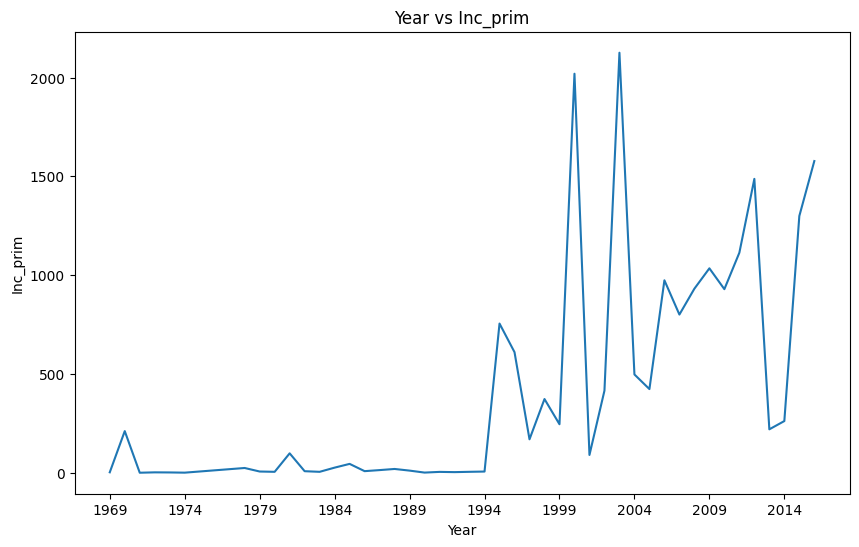

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.plot(df.index, df.values)

#Set x-ticks every 5 years
years = df.index
plt.xticks(ticks=np.arange(min(years), max(years)+1, 5))

plt.xlabel('Year')
plt.ylabel('Tularemia Incidence')
plt.title('Tularemia Incidence')
plt.show()


Early Period (1969 - Mid-1990s):

For the initial period, from 1969 up until approximately the mid-1990s (around 1994), the "Inc_prim" values are consistently very low, hovering near zero. There are a few very small spikes, but the overall level of infections remains minimal.

Around 1994-1995, there's a noticeable shift. The "Inc_prim" values start to rise more significantly.

There are several very prominent spikes, indicating periods of exceptionally high infection rates (e.g., around 2000, 2003-2004, and then another series of peaks from around 2008-2015). The highest peak reaches over 2000 "Inc_prim" values around 2003.

Overall infection rates are higher, they are also less predictable, with a greater tendency for large surges.

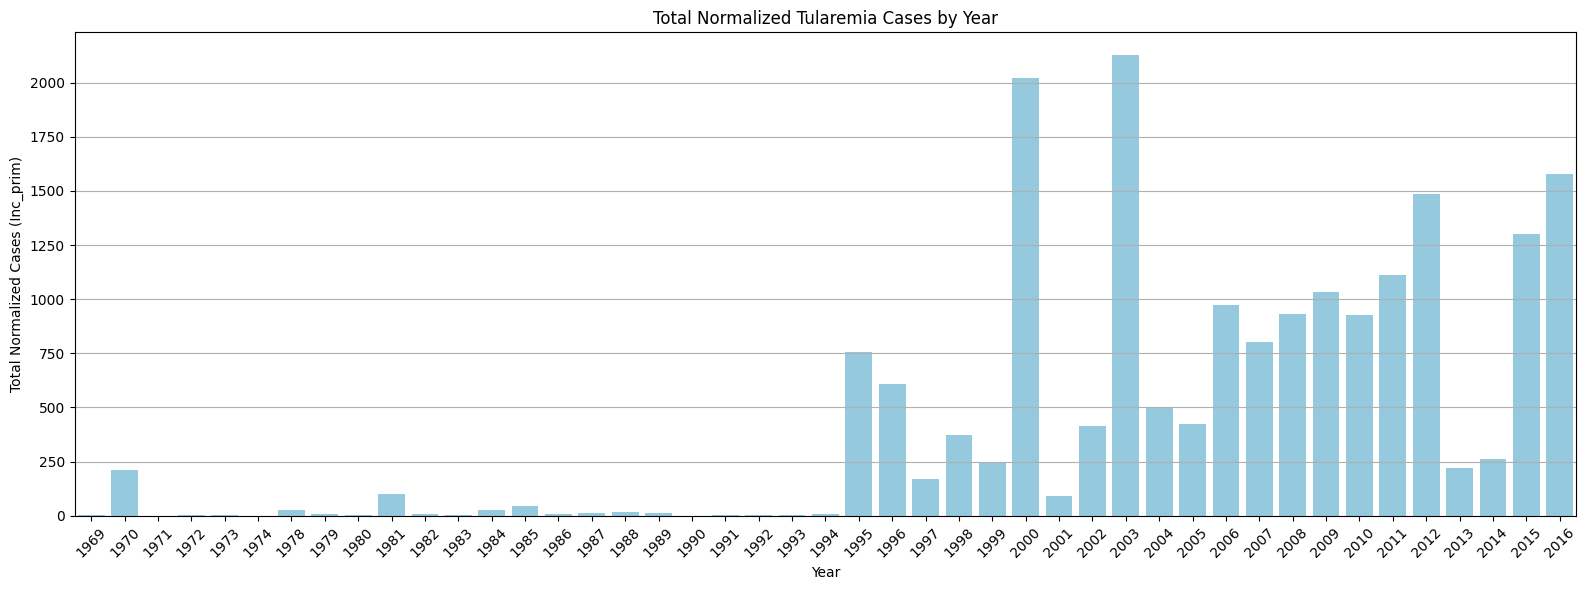

In [74]:
plt.figure(figsize=(16, 6))
sns.barplot(x=df.index, y=df.values, color='skyblue')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Total Cases (Inc_prim)')
plt.title('Total Tularemia Cases by Year')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

In [75]:
data_analysis = data[['Year','Inc_prim']]
new_data = data_analysis.groupby('Year').sum()
new_data

,Inc_prim
Year,
1969,2.309157
1970,210.773333
1971,0.180000
1972,2.050000
1973,1.580000
1974,0.510000
1978,24.124139
1979,6.288496
1980,4.730208


In [76]:
#Preparing climate change variable

import requests
from bs4 import BeautifulSoup

#Download the file
url = 'https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt'

headers = {"User-Agent":"Chrome/114.0.0.0 Safari/537.36"}

response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.content, 'html.parser')

data = response.content.decode('utf-8')

#Split into lines and ignore header (first ~5 lines)
lines = data.split('\n')[5:]
lines

['1880     -0.17     -0.10',
 '1881     -0.09     -0.13',
 '1882     -0.11     -0.17',
 '1883     -0.18     -0.21',
 '1884     -0.28     -0.24',
 '1885     -0.34     -0.27',
 '1886     -0.32     -0.28',
 '1887     -0.37     -0.28',
 '1888     -0.17     -0.27',
 '1889     -0.11     -0.26',
 '1890     -0.36     -0.26',
 '1891     -0.23     -0.26',
 '1892     -0.28     -0.27',
 '1893     -0.32     -0.27',
 '1894     -0.31     -0.25',
 '1895     -0.23     -0.23',
 '1896     -0.12     -0.21',
 '1897     -0.12     -0.19',
 '1898     -0.29     -0.18',
 '1899     -0.19     -0.19',
 '1900     -0.10     -0.21',
 '1901     -0.17     -0.25',
 '1902     -0.29     -0.27',
 '1903     -0.38     -0.30',
 '1904     -0.49     -0.32',
 '1905     -0.28     -0.35',
 '1906     -0.24     -0.37',
 '1907     -0.40     -0.39',
 '1908     -0.44     -0.41',
 '1909     -0.50     -0.42',
 '1910     -0.45     -0.43',
 '1911     -0.45     -0.40',
 '1912     -0.37     -0.36',
 '1913     -0.36     -0.34',
 '1914     -0.

In [77]:
rows = [line.split(',') for line in lines]
rows

[['1880     -0.17     -0.10'],
 ['1881     -0.09     -0.13'],
 ['1882     -0.11     -0.17'],
 ['1883     -0.18     -0.21'],
 ['1884     -0.28     -0.24'],
 ['1885     -0.34     -0.27'],
 ['1886     -0.32     -0.28'],
 ['1887     -0.37     -0.28'],
 ['1888     -0.17     -0.27'],
 ['1889     -0.11     -0.26'],
 ['1890     -0.36     -0.26'],
 ['1891     -0.23     -0.26'],
 ['1892     -0.28     -0.27'],
 ['1893     -0.32     -0.27'],
 ['1894     -0.31     -0.25'],
 ['1895     -0.23     -0.23'],
 ['1896     -0.12     -0.21'],
 ['1897     -0.12     -0.19'],
 ['1898     -0.29     -0.18'],
 ['1899     -0.19     -0.19'],
 ['1900     -0.10     -0.21'],
 ['1901     -0.17     -0.25'],
 ['1902     -0.29     -0.27'],
 ['1903     -0.38     -0.30'],
 ['1904     -0.49     -0.32'],
 ['1905     -0.28     -0.35'],
 ['1906     -0.24     -0.37'],
 ['1907     -0.40     -0.39'],
 ['1908     -0.44     -0.41'],
 ['1909     -0.50     -0.42'],
 ['1910     -0.45     -0.43'],
 ['1911     -0.45     -0.40'],
 ['1912 

In [78]:
# Split each string into a list of values
cleaned_rows = [row[0].split() for row in rows]
cleaned_rows

[['1880', '-0.17', '-0.10'],
 ['1881', '-0.09', '-0.13'],
 ['1882', '-0.11', '-0.17'],
 ['1883', '-0.18', '-0.21'],
 ['1884', '-0.28', '-0.24'],
 ['1885', '-0.34', '-0.27'],
 ['1886', '-0.32', '-0.28'],
 ['1887', '-0.37', '-0.28'],
 ['1888', '-0.17', '-0.27'],
 ['1889', '-0.11', '-0.26'],
 ['1890', '-0.36', '-0.26'],
 ['1891', '-0.23', '-0.26'],
 ['1892', '-0.28', '-0.27'],
 ['1893', '-0.32', '-0.27'],
 ['1894', '-0.31', '-0.25'],
 ['1895', '-0.23', '-0.23'],
 ['1896', '-0.12', '-0.21'],
 ['1897', '-0.12', '-0.19'],
 ['1898', '-0.29', '-0.18'],
 ['1899', '-0.19', '-0.19'],
 ['1900', '-0.10', '-0.21'],
 ['1901', '-0.17', '-0.25'],
 ['1902', '-0.29', '-0.27'],
 ['1903', '-0.38', '-0.30'],
 ['1904', '-0.49', '-0.32'],
 ['1905', '-0.28', '-0.35'],
 ['1906', '-0.24', '-0.37'],
 ['1907', '-0.40', '-0.39'],
 ['1908', '-0.44', '-0.41'],
 ['1909', '-0.50', '-0.42'],
 ['1910', '-0.45', '-0.43'],
 ['1911', '-0.45', '-0.40'],
 ['1912', '-0.37', '-0.36'],
 ['1913', '-0.36', '-0.34'],
 ['1914', '-0.

In [79]:
#Creating DataFrame
df = pd.DataFrame(cleaned_rows, columns=["Year", "No_Smoothing", "Lowess"])
df

,Year,No_Smoothing,Lowess
0,1880,-0.17,-0.10
1,1881,-0.09,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.21
4,1884,-0.28,-0.24
...,...,...,...
141,2021,0.85,1.03
142,2022,0.90,1.09
143,2023,1.18,1.14
144,2024,1.29,1.20


In [80]:
#Deleting 'Lowess', axis=1 means drop columns

data = df.drop(columns=["Lowess"], axis=1)
data

,Year,No_Smoothing
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.18
4,1884,-0.28
...,...,...
141,2021,0.85
142,2022,0.90
143,2023,1.18
144,2024,1.29


In [81]:
#Renaming the column 'No_Smoothing'

data = data.rename(columns={'No_Smoothing': 'Global Surface Temperature'})
data

,Year,Global Surface Temperature
0,1880,-0.17
1,1881,-0.09
2,1882,-0.11
3,1883,-0.18
4,1884,-0.28
...,...,...
141,2021,0.85
142,2022,0.90
143,2023,1.18
144,2024,1.29


In [83]:
#Check for missing values in the 'Global Surface Temperature' and 'Year' columns
#If any nulls are found, they should be dropped before further analysis

print(data['Global Surface Temperature'].isnull().sum())
print(data['Year'].isnull().sum())

1
1


/tmp/ipython-input-84-2330104087.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean["Year"] = data_clean["Year"].astype(int)
/tmp/ipython-input-84-2330104087.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Global Surface Temperature'] = data_clean['Global Surface Temperature'].astype(float)


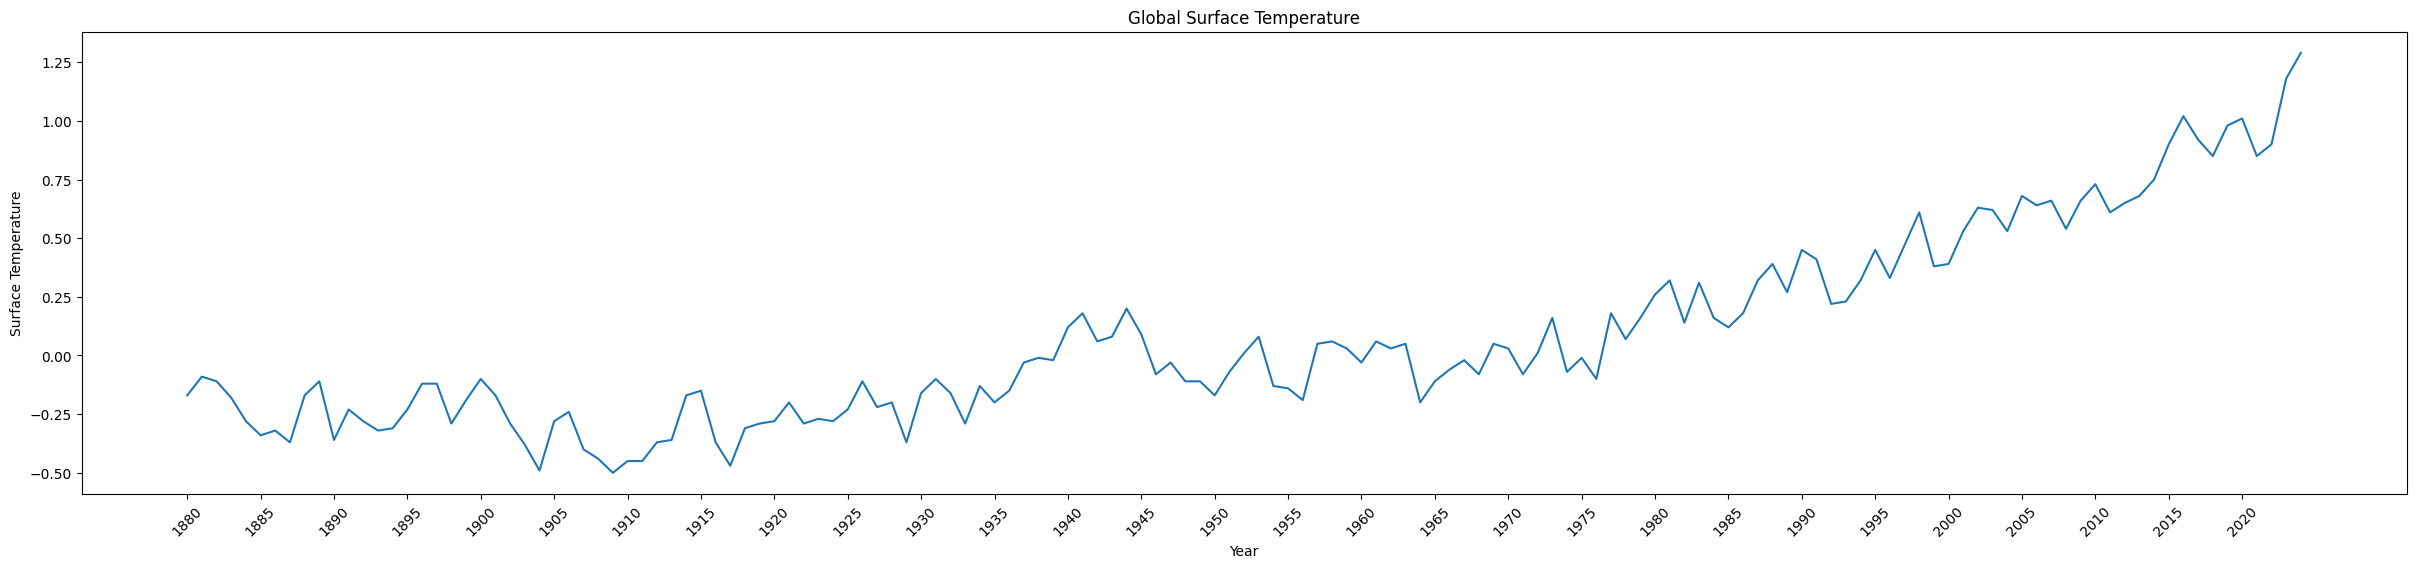

In [84]:
data_clean = data.dropna(subset=['Year', 'Global Surface Temperature'])

#To do math or plotting properly, i must convert it to an integer

data_clean["Year"] = data_clean["Year"].astype(int)
data_clean['Global Surface Temperature'] = data_clean['Global Surface Temperature'].astype(float)

plt.figure(figsize=(30, 6))
plt.plot(data_clean['Year'], data_clean['Global Surface Temperature'])
plt.xticks(rotation=45)

#Set x-ticks every 5 years
plt.xticks(np.arange(data_clean['Year'].min(), data_clean['Year'].max() + 1, 5))
plt.xlabel('Year')
plt.ylabel('Surface Temperature')
plt.title('Global Surface Temperature')
plt.show()


In [85]:
#Merge climate data (surface temperature) with disease incidence data on the 'Year' column
#This allows us to analyze the relationship between temperature changes and disease trends

data_merge = pd.merge(data_clean, new_data, on='Year')
data_merge

,Year,Global Surface Temperature,Inc_prim
0,1969,0.05,2.309157
1,1970,0.03,210.773333
2,1971,-0.08,0.180000
3,1972,0.01,2.050000
4,1973,0.16,1.580000
5,1974,-0.07,0.510000
6,1978,0.07,24.124139
7,1979,0.16,6.288496
8,1980,0.26,4.730208
9,1981,0.32,98.295217


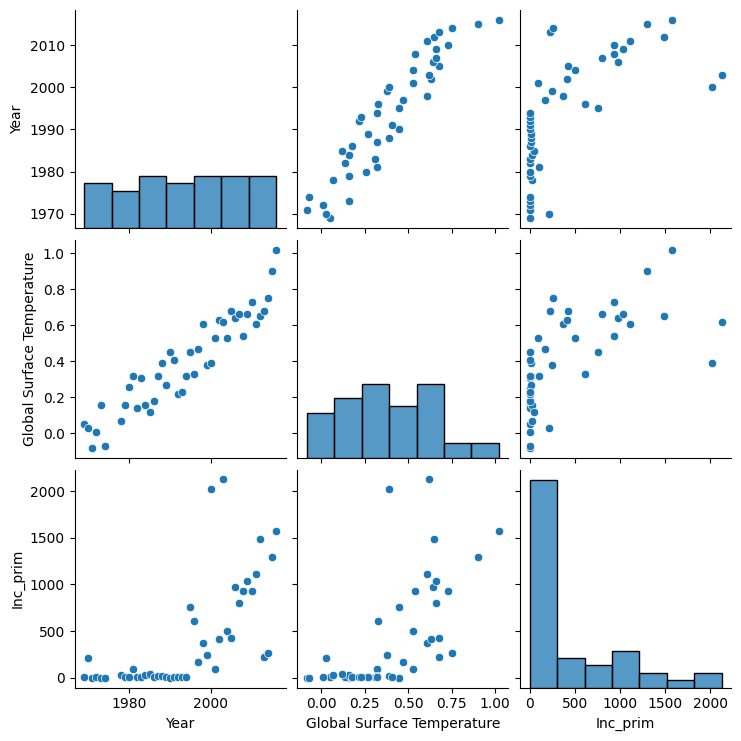

In [89]:
sns.pairplot(data_merge[['Year', 'Global Surface Temperature', 'Inc_prim']])
plt.show()

Row 3, Column 1 (Inc_prim vs. Year): This plot shows a very interesting trend. For much of the earlier period (roughly before 2000), "Inc_prim" values are very low. After around 2000, there's a significant increase and wider spread in "Inc_prim" values, indicating a rise in infections, particularly in later years.

Row 3, Column 2 (Inc_prim vs. Global Surface Temperature): For lower global surface temperatures (roughly below 0.25), the "Inc_prim" values are consistently very low.

As the "Global Surface Temperature" increases, particularly beyond 0.25, there's a noticeable increase in the "Inc_prim" values. The spread of "Inc_prim" also widens, suggesting that higher temperatures are associated with not just higher average infection rates but also greater variability or potential for larger outbreaks.
This indicates that while higher temperatures don't guarantee a large outbreak every time, they create the conditions under which very large outbreaks are possible.

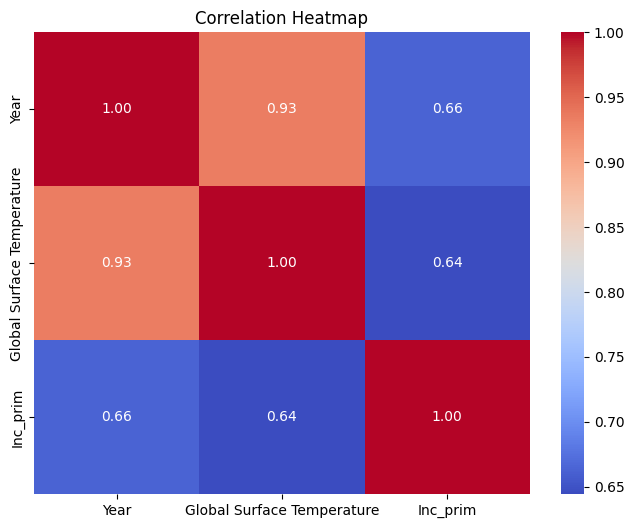

In [94]:
#Compute correlation matrix
corr = data_merge[['Year', 'Global Surface Temperature', 'Inc_prim']].corr()

#Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

The strongest relationship is the increase in global surface temperature over time (Year vs. Global Surface Temperature, r=0.93).

Both "Year" and "Global Surface Temperature" show positive correlations with "Inc_prim." The correlation between "Global Surface Temperature" and "Inc_prim" (r=0.64) is significant, reinforcing the idea that warmer conditions are associated with higher infection rates.

The values (0.64/0.66) indicate a meaningful relationship, the relationship is not perfectly linear.